In [246]:
import pandas as pd
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBRegressor
from catboost import CatBoostRegressor, Pool
from sklearn.metrics import r2_score, mean_squared_log_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

In [247]:
data_train=pd.read_csv(r"C:\Users\HP\Desktop\hackathon\zelextra  x aws\dataset\train.csv")
data_test=pd.read_csv(r"C:\Users\HP\Desktop\hackathon\zelextra  x aws\dataset\test.csv")
sample_submission = pd.read_csv(r"C:\Users\HP\Desktop\hackathon\zelextra  x aws\dataset\sample_submission.csv")

In [248]:
data_train

,id,temperature,irradiance,humidity,panel_age,maintenance_count,soiling_ratio,voltage,current,module_temperature,cloud_coverage,wind_speed,pressure,string_id,error_code,installation_type,efficiency
0,0,7.817315,576.179270,41.24308670850264,32.135501,4.0,0.803199,37.403527,1.963787,13.691147,62.494044,12.82491203459621,1018.8665053152533,A1,NaN,NaN,0.562096
1,1,24.785727,240.003973,1.3596482765960705,19.977460,8.0,0.479456,21.843315,0.241473,27.545096,43.851238,12.012043660984917,1025.6238537572883,D4,E00,dual-axis,0.396447
2,2,46.652695,687.612799,91.26536837560256,1.496401,4.0,0.822398,48.222882,4.191800,43.363708,NaN,1.814399755560454,1010.9226539809573,C3,E00,NaN,0.573776
3,3,53.339567,735.141179,96.19095521176159,18.491582,3.0,0.837529,46.295748,0.960567,57.720436,67.361473,8.736258932034128,1021.8466633134253,A1,NaN,dual-axis,0.629009
4,4,5.575374,12.241203,27.495073003585226,30.722697,6.0,0.551833,0.000000,0.898062,6.786263,3.632000,0.52268384077164,1008.5559577591927,B2,E00,fixed,0.341874
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,19995,16.868428,NaN,93.53031757838667,14.393967,3.0,0.738911,12.147711,3.005355,26.206810,1.733013,12.594122273332914,1018.3744670739436,B2,E02,tracking,0.664907
19996,19996,53.415061,296.970303,93.98571391279083,25.997012,2.0,0.513061,0.000000,0.532119,65.000000,64.558667,0.9769909288128159,1016.081102065643,D4,E00,fixed,0.354070
19997,19997,2.442727,660.328019,37.9689180401391,32.818396,9.0,0.548602,13.047950,4.075498,11.584869,57.730134,4.750937249871706,1009.6844614602336,D4,NaN,tracking,0.419734
19998,19998,NaN,632.760700,43.01470184078199,19.063517,4.0,NaN,0.000000,1.068906,21.149351,78.123689,11.304158443374758,1006.6738746072241,A1,E00,tracking,0.661963


In [249]:
data_train.dtypes

id                      int64
temperature           float64
irradiance            float64
humidity               object
panel_age             float64
maintenance_count     float64
soiling_ratio         float64
voltage               float64
current               float64
module_temperature    float64
cloud_coverage        float64
wind_speed             object
pressure               object
string_id              object
error_code             object
installation_type      object
efficiency            float64
dtype: object

In [250]:
for col in ['humidity', 'wind_speed', 'pressure']:
    data_train[col] = pd.to_numeric(data_train[col], errors='coerce')
    data_test[col] = pd.to_numeric(data_test[col], errors='coerce')

In [251]:
data_train.fillna(data_train.median(numeric_only=True), inplace=True)
data_test.fillna(data_test.median(numeric_only=True), inplace=True)


In [252]:
'''catg_col=data_train.select_dtypes(include='object').columns
print(catg_col)'''

"catg_col=data_train.select_dtypes(include='object').columns\nprint(catg_col)"

In [253]:
'''le = LabelEncoder()

for col in catg_col:
    data_train[col] = le.fit_transform(data_train[col])'''

'le = LabelEncoder()\n\nfor col in catg_col:\n    data_train[col] = le.fit_transform(data_train[col])'

In [254]:
cat_cols = ['string_id', 'error_code', 'installation_type']
for col in cat_cols:
    le = LabelEncoder()
    data_train[col] = le.fit_transform(data_train[col])
    data_test[col] = le.transform(data_test[col])

In [255]:
data_train.isnull().sum()

id                    0
temperature           0
irradiance            0
humidity              0
panel_age             0
maintenance_count     0
soiling_ratio         0
voltage               0
current               0
module_temperature    0
cloud_coverage        0
wind_speed            0
pressure              0
string_id             0
error_code            0
installation_type     0
efficiency            0
dtype: int64

In [256]:
data_train=data_train.drop('id', axis=1)

In [257]:
data_train


,temperature,irradiance,humidity,panel_age,maintenance_count,soiling_ratio,voltage,current,module_temperature,cloud_coverage,wind_speed,pressure,string_id,error_code,installation_type,efficiency
0,7.817315,576.179270,41.243087,32.135501,4.0,0.803199,37.403527,1.963787,13.691147,62.494044,12.824912,1018.866505,0,3,3,0.562096
1,24.785727,240.003973,1.359648,19.977460,8.0,0.479456,21.843315,0.241473,27.545096,43.851238,12.012044,1025.623854,3,0,0,0.396447
2,46.652695,687.612799,91.265368,1.496401,4.0,0.822398,48.222882,4.191800,43.363708,49.704133,1.814400,1010.922654,2,0,3,0.573776
3,53.339567,735.141179,96.190955,18.491582,3.0,0.837529,46.295748,0.960567,57.720436,67.361473,8.736259,1021.846663,0,3,0,0.629009
4,5.575374,12.241203,27.495073,30.722697,6.0,0.551833,0.000000,0.898062,6.786263,3.632000,0.522684,1008.555958,1,0,1,0.341874
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,16.868428,499.654730,93.530318,14.393967,3.0,0.738911,12.147711,3.005355,26.206810,1.733013,12.594122,1018.374467,1,2,2,0.664907
19996,53.415061,296.970303,93.985714,25.997012,2.0,0.513061,0.000000,0.532119,65.000000,64.558667,0.976991,1016.081102,3,0,1,0.354070
19997,2.442727,660.328019,37.968918,32.818396,9.0,0.548602,13.047950,4.075498,11.584869,57.730134,4.750937,1009.684461,3,3,2,0.419734
19998,24.720345,632.760700,43.014702,19.063517,4.0,0.697663,0.000000,1.068906,21.149351,78.123689,11.304158,1006.673875,0,0,2,0.661963


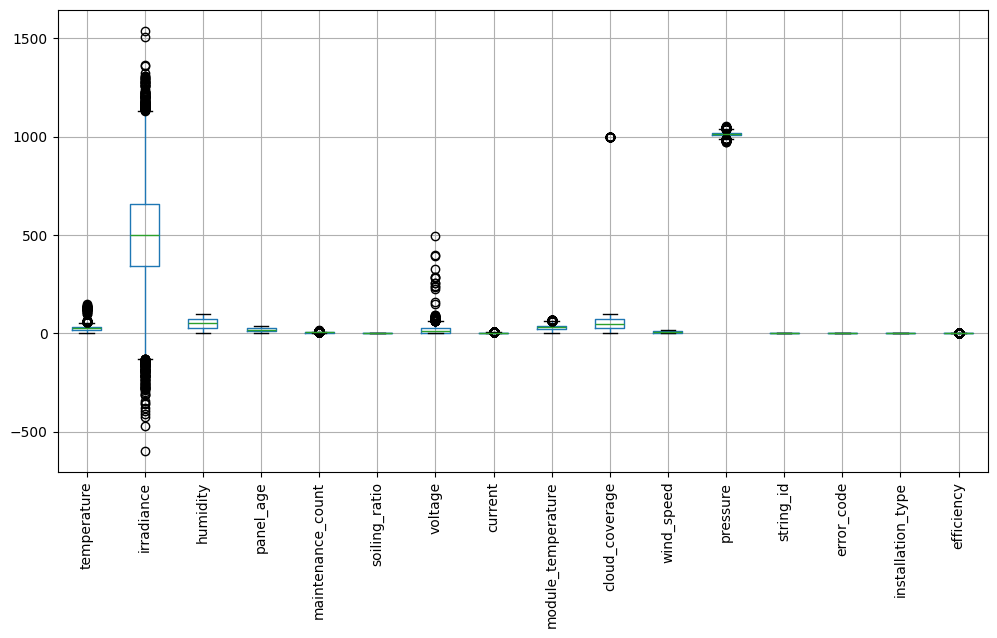

In [258]:
data_train.select_dtypes(include='number').boxplot(figsize=(12,6))
plt.xticks(rotation=90)
plt.show()

In [259]:
def remove_outliers(numerical_col, col:str):
    numerical_col_25_quantile = numerical_col[col].quantile(0.25) 
    numerical_col_75_quantile = numerical_col[col].quantile(0.75)
    iqr = numerical_col_75_quantile - numerical_col_25_quantile 
    upper_limit = numerical_col_75_quantile + 1.5 * iqr
    lower_limit = numerical_col_25_quantile - 1.5 * iqr
    df_filtered = numerical_col[(numerical_col[col] >= lower_limit) & (numerical_col[col] <= upper_limit)]
    return df_filtered

In [260]:
data_train[['irradiance', 'efficiency']].corr()


,irradiance,efficiency
irradiance,1.000000,0.567304
efficiency,0.567304,1.000000


Skewness:
 cloud_coverage        12.932404
voltage                4.188224
temperature            1.029343
current                0.709318
maintenance_count      0.525566
module_temperature     0.091011
wind_speed             0.013568
soiling_ratio          0.011556
error_code             0.011081
panel_age              0.009279
pressure               0.003496
irradiance             0.000450
humidity               0.000216
string_id             -0.013682
installation_type     -0.013886
efficiency            -1.155719
dtype: float64


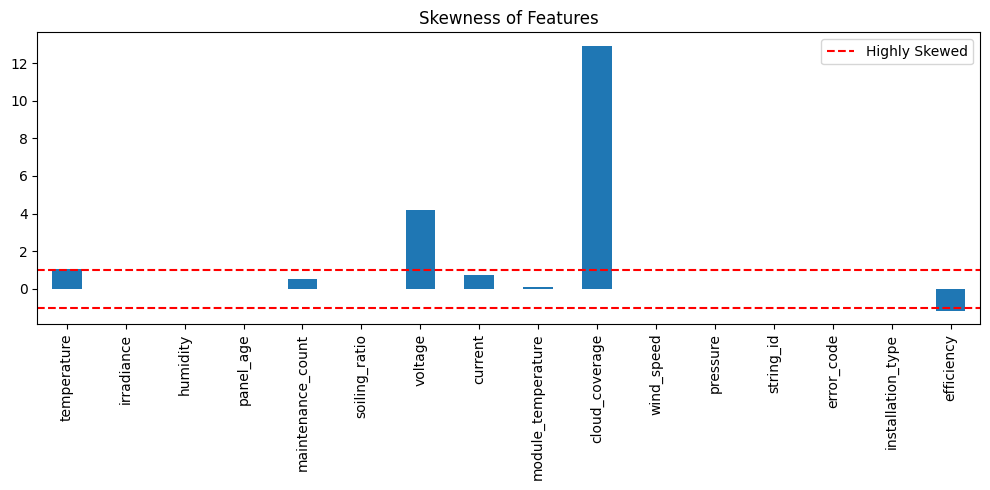


Correlation Matrix:
                     temperature  irradiance  humidity  panel_age  \
temperature            1.000000    0.007826  0.002714  -0.008807   
irradiance             0.007826    1.000000  0.002619   0.006477   
humidity               0.002714    0.002619  1.000000  -0.008093   
panel_age             -0.008807    0.006477 -0.008093   1.000000   
maintenance_count     -0.002237   -0.010487 -0.003088  -0.003760   
soiling_ratio          0.006630    0.004565  0.001362   0.000402   
voltage               -0.009519    0.248109 -0.001537   0.011405   
current                0.006417    0.438402 -0.003287   0.005751   
module_temperature     0.867222    0.006375  0.000878  -0.006274   
cloud_coverage         0.003571   -0.002792  0.001465   0.000427   
wind_speed            -0.005245   -0.004584  0.001312   0.011888   
pressure              -0.003212   -0.005350  0.011401   0.002003   
string_id             -0.004258    0.008626 -0.004037  -0.022824   
error_code             0.0

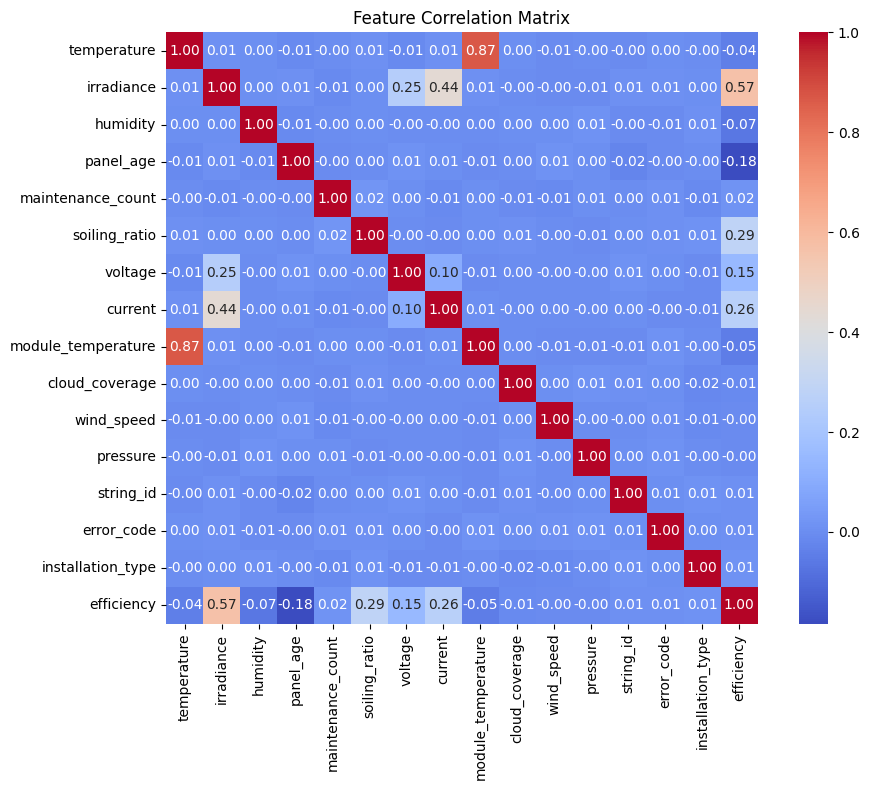

In [261]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Check skewness
skewness = data_train.skew(numeric_only=True)
print("Skewness:\n", skewness.sort_values(ascending=False))

# Plot skewness
skewness.plot(kind='bar', figsize=(10, 5), title="Skewness of Features")
plt.axhline(1, color='r', linestyle='--', label='Highly Skewed')
plt.axhline(-1, color='r', linestyle='--')
plt.legend()
plt.tight_layout()
plt.show()

# Check correlation matrix
corr_matrix = data_train.corr(numeric_only=True)

# Display correlation matrix
print("\nCorrelation Matrix:\n", corr_matrix)

# Heatmap for better visualization
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title("Feature Correlation Matrix")
plt.tight_layout()
plt.show()


In [262]:
data_train['cloud_coverage'] = np.log1p(data_train['cloud_coverage'])
data_test['cloud_coverage'] = np.log1p(data_test['cloud_coverage'])

data_train['Power']=data_train['voltage']/data_train['current']
data_test['Power']=data_test['voltage']/data_test['current']

#data_train['efficiency_guess']=data_train['power']/data_train['irradiance']
#data_test['efficiency_guess']=data_test['power']/data_test['irradiance']


In [263]:
data_train

,temperature,irradiance,humidity,panel_age,maintenance_count,soiling_ratio,voltage,current,module_temperature,cloud_coverage,wind_speed,pressure,string_id,error_code,installation_type,efficiency,Power
0,7.817315,576.179270,41.243087,32.135501,4.0,0.803199,37.403527,1.963787,13.691147,4.150946,12.824912,1018.866505,0,3,3,0.562096,19.046631
1,24.785727,240.003973,1.359648,19.977460,8.0,0.479456,21.843315,0.241473,27.545096,3.803351,12.012044,1025.623854,3,0,0,0.396447,90.458515
2,46.652695,687.612799,91.265368,1.496401,4.0,0.822398,48.222882,4.191800,43.363708,3.926007,1.814400,1010.922654,2,0,3,0.573776,11.504098
3,53.339567,735.141179,96.190955,18.491582,3.0,0.837529,46.295748,0.960567,57.720436,4.224809,8.736259,1021.846663,0,3,0,0.629009,48.196272
4,5.575374,12.241203,27.495073,30.722697,6.0,0.551833,0.000000,0.898062,6.786263,1.532989,0.522684,1008.555958,1,0,1,0.341874,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,16.868428,499.654730,93.530318,14.393967,3.0,0.738911,12.147711,3.005355,26.206810,1.005405,12.594122,1018.374467,1,2,2,0.664907,4.042022
19996,53.415061,296.970303,93.985714,25.997012,2.0,0.513061,0.000000,0.532119,65.000000,4.182945,0.976991,1016.081102,3,0,1,0.354070,0.000000
19997,2.442727,660.328019,37.968918,32.818396,9.0,0.548602,13.047950,4.075498,11.584869,4.072953,4.750937,1009.684461,3,3,2,0.419734,3.201560
19998,24.720345,632.760700,43.014702,19.063517,4.0,0.697663,0.000000,1.068906,21.149351,4.371012,11.304158,1006.673875,0,0,2,0.661963,0.000000


In [264]:
X=data_train.drop("efficiency", axis=1)
y=data_train["efficiency"]

In [265]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [266]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
base_models = {
    "XGBoost": XGBRegressor(),
    "CatBoost": CatBoostRegressor(verbose=0)
}

# STEP 3: Define parameter grids for RandomizedSearchCV
param_grids = {
    "XGBoost": {
        'n_estimators': [100, 200, 300],
        'max_depth': [3, 5, 7],
        'learning_rate': [0.01, 0.05, 0.1],
        'subsample': [0.7, 1.0],
        'colsample_bytree': [0.7, 1.0]
    },
    "CatBoost": {
        'depth': [4, 6, 8],
        'learning_rate': [0.01, 0.03, 0.1],
        'iterations': [100, 200, 300],
        'l2_leaf_reg': [1, 3, 5],
        'border_count': [32, 64, 128]
    }
}

# STEP 4: RandomizedSearchCV tuning
tuned_models = {}

for name, model in base_models.items():
    print(f"\nTuning {name}...")
    random_search = RandomizedSearchCV(
        estimator=model,
        param_distributions=param_grids[name],
        n_iter=20,  # total random combinations to try
        scoring='neg_root_mean_squared_error',
        cv=3,
        random_state=42,
        n_jobs=-1
    )
    random_search.fit(X_train, y_train)
    tuned_models[name] = random_search.best_estimator_
    print(f"Best parameters for {name}: {random_search.best_params_}")


results = []


Tuning XGBoost...
Best parameters for XGBoost: {'subsample': 0.7, 'n_estimators': 300, 'max_depth': 3, 'learning_rate': 0.05, 'colsample_bytree': 1.0}

Tuning CatBoost...
Best parameters for CatBoost: {'learning_rate': 0.1, 'l2_leaf_reg': 5, 'iterations': 100, 'depth': 4, 'border_count': 128}


In [267]:
'''from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import AdaBoostRegressor

models = {
    "XGBoost": XGBRegressor(),
    "catboost": CatBoostRegressor(verbose=0),
    
}

results = []'''

'from sklearn.preprocessing import StandardScaler\nfrom sklearn.metrics import mean_squared_error, r2_score\nfrom sklearn.linear_model import LinearRegression, Ridge, Lasso\nfrom sklearn.tree import DecisionTreeRegressor\nfrom sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor\nfrom sklearn.svm import SVR\nfrom sklearn.neighbors import KNeighborsRegressor\nfrom xgboost import XGBRegressor\nfrom sklearn.ensemble import AdaBoostRegressor\n\nmodels = {\n    "XGBoost": XGBRegressor(),\n    "catboost": CatBoostRegressor(verbose=0),\n    \n}\n\nresults = []'

In [268]:
from sklearn.metrics import r2_score, mean_squared_error

In [269]:
for name, model in tuned_models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    results.append((name, r2, rmse))
    print(f"Model: {name}, R2 Score: {r2:.4f}, RMSE: {rmse:.4f}")

# STEP 5: Display sorted results
results_df = pd.DataFrame(results, columns=["Model", "R2_Score", "RMSE"])
print("\nSorted Results:")
print(results_df.sort_values(by="R2_Score", ascending=False))

Model: XGBoost, R2 Score: 0.4366, RMSE: 0.1064
Model: CatBoost, R2 Score: 0.4403, RMSE: 0.1061

Sorted Results:
      Model  R2_Score      RMSE
1  CatBoost  0.440334  0.106073
0   XGBoost  0.436582  0.106428


In [270]:
new_data_test=data_test.drop('id', axis=1)

In [271]:
new_data_test

,temperature,irradiance,humidity,panel_age,maintenance_count,soiling_ratio,voltage,current,module_temperature,cloud_coverage,wind_speed,pressure,string_id,error_code,installation_type,Power
0,17.618379,85.449838,90.815423,13.910963,6.0,0.889765,6.370396,0.069101,19.517274,3.541246,7.181958,1034.782455,2,1,2,92.189303
1,34.826323,722.801748,20.982993,20.916528,4.0,0.590372,30.095867,1.713852,37.421443,3.506370,4.184582,992.319752,3,0,3,17.560365
2,33.776934,485.491998,55.614050,1.446962,3.0,0.611425,28.424430,1.696936,32.147763,4.257219,6.259441,999.213457,3,1,0,16.750441
3,18.584189,350.022720,49.044766,18.810133,5.0,0.697455,7.848038,0.787188,25.734118,3.781066,2.769607,1026.650078,2,2,0,9.969711
4,43.044908,437.295622,8.761571,17.402885,8.0,0.564938,12.300717,1.867620,29.952897,3.951739,11.846974,1010.809943,1,3,1,6.586308
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11995,40.581656,492.446562,35.496012,4.508170,8.0,0.697455,40.883724,3.434505,48.476050,2.709061,3.135128,1008.966267,3,0,2,11.903817
11996,16.958524,198.844667,4.063816,4.021203,4.0,0.810999,0.000000,1.290352,23.502657,3.169201,9.363424,1023.566458,2,2,2,0.000000
11997,24.055333,757.621634,2.797670,15.253932,3.0,0.697455,5.855590,4.835729,31.908375,4.597112,14.355945,1011.665828,0,0,3,1.210901
11998,15.623725,177.376256,0.671049,16.437613,2.0,0.861087,0.000000,1.159060,23.835495,2.359077,6.958665,1017.657263,1,3,0,0.000000


In [272]:
print(new_data_test.shape)

(12000, 16)


In [273]:
y_pred = tuned_models["CatBoost"].predict(new_data_test)


In [274]:
y_pred

array([0.39764344, 0.53373617, 0.51276291, ..., 0.61738418, 0.43818842,
       0.54368155], shape=(12000,))

In [275]:
print(len(y_pred))

12000


In [276]:
print("Negative predictions:", (y_pred < 0).sum())

Negative predictions: 0


In [277]:

# Assuming:
# - y_pred contains your model's predictions
# - data_test is your original test DataFrame (before dropping 'id')
# - sample_submission is a DataFrame with correct column names and structure

submission = pd.DataFrame({
    'id': data_test['id'],            # Ensure you kept the 'id' column earlier
    'efficiency': y_pred              # Your model's predictions
})

# (Optional) Match the exact column order and names of sample_submission
submission = submission[sample_submission.columns]

# Save to CSV without index
submission.to_csv("17submission.csv", index=False)